## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# Read in the dataset and examine columns and first few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Find the shape of the dataframe to show the number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
# Find the number of unique users
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [4]:
# Find the proportion of individuals that converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [5]:
# Find the rows that are not accurate because they do not have treatment and new page
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [6]:
# Find any rows that have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [4]:
# Drop the rows of data that are innacurrate bcause they do not have treatment and new page or control adn old page
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

In [5]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
# Find the number of unique values in teh dataframe.
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?
c. What is the row information for the repeat **user_id**? 

In [6]:
# Find the repeated user_id and the row information for the user
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [6]:
# Drop the duplicate row
df2.drop_duplicates(subset=['user_id'], inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [12]:
# Find the probability of an individual converting 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [13]:
# Find the probabilty of an individual converting in the control group
(df2.query('group == "control"')['converted'] == True).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [14]:
# Find the probabilty that an individual converting in the treatment group
(df2.query('group == "treatment"')['converted'] == True).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [15]:
# Find the probabilty that an individual received the new page
df2.query('landing_page == "new_page"').shape[0] / df2.landing_page.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the results from parts (a) through (d) it looks like the probalilty that an individual converted after landing on the new treatment page was lower than the conversion if they landed on the old page, so I do not beleive that there is sufficient evidence to be able to conclude that the new treatment page leads to more conversions because the data so far is showing the opposite.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null : Pold >= Pnew
Alternate: Pold < Pnew**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [7]:
# Find the conversion rate for Pnew 
p_new = (df2.converted == 1).mean()
print(p_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [8]:
# Find the conversion rate for Pold
p_old = (df2.converted == 1).mean()
print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [9]:
# Find the number of individuals in the treatment group
n_new = sum(df2['group'] == "treatment")
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [10]:
# Find the number of individuals in the control group
n_old = sum(df2['group'] == "control")
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [11]:
# Create simulation with Nnew and Pnew 
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new, p_new])
new_page_converted.mean()

0.11867731057738627

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [15]:
# Create simulation with Nold and Pold
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1-p_old, p_old])
old_page_converted.mean()

0.11912661591200077

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [16]:
# Find the observed difference in the simulated values above 
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.00044930533461449984

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [17]:
# Create a sample usinf the simulations created above
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [1-p_old, p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

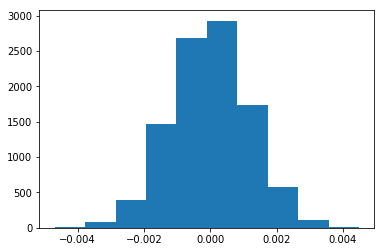

In [18]:
# Plot p_diffs on histogram 
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# Find the p-value 
(p_diffs > obs_diff).mean() 

0.65010000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j I computed the p-value, which is the probability of observing the statistic if the null hypothesis is true. This p-value is higher than the 5% error rate which means that the null hypothesis should be accepted because the new page did not convert more individuals than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [9]:
# Import needed library
import statsmodels.api as sm

# Find the number of conversions for each page and the number of individuals that received each page
convert_old = sum((df2.group == 'control') & (df2.converted == 1))
convert_new = sum((df2.group == 'treatment') & (df2.converted == 1))
n_old = sum(df2.group == 'control')
n_new = sum(df2.group == 'treatment')

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [7]:
# Find the z-score and p-value 
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], 
[n_new, n_old], alternative = 'larger') 
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is -1.31, which is between -1.96 and 1.96 and the p-value is 0.91, which is above 0.05. This means that the null hypothesis does not get rejected so the new page does not have more conversions than the old page, this agrees with the p-value results in the previous test.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression should be used it this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [10]:
# Create ab_page and intercept and then make sure both were created
df2['ab_page'] = (df2.group == 'treatment').astype(int)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [11]:
# Create regression model with ab_page and fit the model
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [12]:
# Show statistical results 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        02:31:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In [13]:
# Exponentiate the coefficient for the ab_page.
np.exp(0.0150)

1.0151130646157189

**The p-value associated with the ab_page is 0.19. The null and alternative hypothesis associatied with the regression model are: H0 There is no relationship between the new page and conversion. H1 There is a relationship between the new page and conversion. This differs from the null and alternative hypothesis in Part II which were: H0 The old page converted greater than or equal to the individuals converted by the new page. H1 The alternative was that the new page converted more individuals than the old page. In the regression model it is the confidence that there is a relationship between new page and conversion.**

**In the model above you can see that the ab_page is 1.02 times more likley to convert an individual than the old page but when the p-value is considered it shows that there is low confidence that the conversion is based on the new page rather than random occurences because it is above 5%.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is good to consider other factors that may be infuencing whether an individual converts or not because you may be focused on one variable, but there may be other factors that are inflencing the individual to convert more than the one you are focusing on and you may be putting too much emphasis on that particular variable. When adding terms to a regression model you have to be aware that if you add to many it can dilute your association results and it can skew the results if there are several variables that are highly correlated with eachother.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [14]:
# Read in the countries.csv file and examine the columns
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [15]:
# Join the countries datframe and df2 and make sure they were joined
df2c = df2.set_index('user_id').join(dfc.set_index('user_id'))
df2c.head(20)

,timestamp,group,landing_page,converted,ab_page,intercept,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US
936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,US
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK


In [16]:
# Create dummy variables for the countries with US as base
df2c[['US', 'CA', 'UK']] = pd.get_dummies(df2c['country'])
df2c = df2c.drop('US', axis = 1)
df2c.head(20)

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,US,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,US,0,1
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,1,0


In [17]:
# Create regression model with countries and fit model
logit_mod_country = sm.Logit(df2c['converted'], df2c[['intercept', 'ab_page', 'CA', 'UK']])
results2 = logit_mod_country.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [18]:
# Show statistical results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:               2.323e-05
Time:                        02:31:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA             0.0506      0.028      1.784      0.074      -0.005       0.106
UK             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [19]:
# Exponentiate the coefficient for the CA and UK.
np.exp(0.0507), np.exp(0.0408)

(1.0520072437650141, 1.0416437559600236)

**The p-value in the model above that includes the country variable shows that there is a higher confidence that there is a relationship between country and conversion. The p-value for Canada is 0.074 and for the UK is 0.13, which shows that even though the confidence is not 95% confidence, the confindece of the relationship between Canada and conversion is higher than the new page and the UK. Although the confidence is low for the relationship between the countries and conversion, the model above shows that individuals in Canada are 1.05 times more likely to convert than individuals in the US, while individuals in the UK are 1.04 time more likley to convert than in the US.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [20]:
# Create new columns that include factors of both country and conversion 
df2c['ca_page'] = df2c['ab_page']*df2c['CA']
df2c['uk_page'] = df2c['ab_page']*df2c['UK']

In [21]:
# Create regression model with new ca_page and uk_page and fit model
logit_mod_country = sm.Logit(df2c['converted'], df2c[['intercept', 'ab_page', 'CA', 'UK', 'ca_page', 'uk_page']])
results3 = logit_mod_country.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [22]:
# Show statistical results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 10 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        02:32:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
CA             0.0118      0.040      0.296      0.767      -0.066       0.090
UK             0.0175      0.038      0.465      0.642      -0.056       0.091
ca_page        0.0783      0.057      1.378      0.168      -0.033       0.190
uk_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [23]:
# Exponentiate the coefficient for the ca_page and uk_page.
np.exp(0.0783), np.exp(0.0469)

(1.0814470441230692, 1.0480172021191829)

**An individual that receives the new page in Canada is 1.08 times more likely than an individual in the US that recieves the old page to convert. An individual that receives the new page in the Uk is 1.05 times more likely to convert than an individual in the US that receives the old page. Based on the model above the p-values are still too high to have 95% confidence that the the conversions are related to the country and the page.**

<a id='conclusions'></a>
## Finishing Up

**After going through these three different steps in analysis I do not believe that there is enough confidence that the new page is responsible for more conversions than the old page as opposed to random occurences, therefore, I think the company should keep the old page. None of the p-values were 0.05 or less, which makes for a confidence interval lower than 95%. The relationship between the different variables tested were not strong enough to determine that they had a large enough effect on the conversion to implement the new page over the old page. Even if the p-values for the regression models were closer to 0.05 the new page being 1 time more likely to convert an individual than the old page is not enough for it to be worth implementing the new page.**


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0